In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from scipy.io import wavfile

In [2]:
# importing wav file
myAudio = "/home/jeremy/desktop/Pa.wav"
samplingFreq, pa = wavfile.read(myAudio)
pa = pa[:,0]
samplePoints = float(pa.shape[0])
timeArray = np.arange(0, samplePoints, 1)
timeArray = timeArray / samplingFreq
timeArray = timeArray*1000 

myAudio2 = "/home/jeremy/desktop/Ba.wav"
samplingFreq, ba = wavfile.read(myAudio2)
ba = ba[:,0]
samplePoints1 = float(ba.shape[0])
timeArray1 = np.arange(0, samplePoints1, 1)
timeArray1 = timeArray1 / samplingFreq
timeArray1 = timeArray1*1000 

/home/jeremy/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
# import ITPC spectrum in response to syllables
itpcpa = np.load("/home/jeremy/Desktop/itc_syllable_pa_by_roi.npz")
itpcba = np.load("/home/jeremy/Desktop/itc_syllable_ba_by_roi.npz")

mean_area1 = itpcpa['pa_pac_l']
mean_area2 = itpcpa['pa_pac_r']
mean_area3 = itpcpa['pa_sac_l']
mean_area4 = itpcpa['pa_sac_r']
mean_area5 = itpcpa['pa_aac_l']
mean_area6 = itpcpa['pa_sac_r']

mean_area11 = itpcba['ba_pac_l']
mean_area22 = itpcba['ba_pac_r']
mean_area33 = itpcba['ba_sac_l']
mean_area44 = itpcba['ba_sac_r']
mean_area55 = itpcba['ba_aac_l']
mean_area66 = itpcba['ba_aac_r']

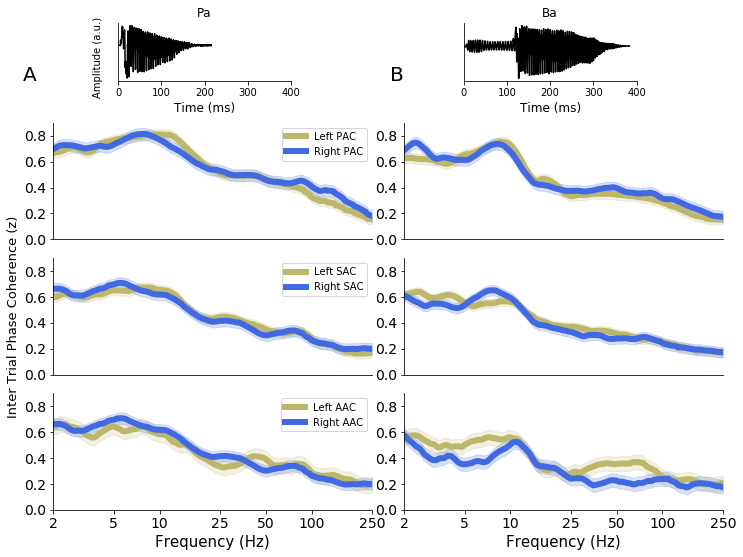

In [4]:
# plotting ITPC spectrums in response to syllables Ba vs Pa
freqs = np.logspace(*np.log10([2, 250]), num=200)

name1 ='Left PAC'
name2 ='Right PAC'
name3 ='Left SAC'
name4 ='Right SAC'
name5 ='Left AAC'
name6 ='Right AAC'

widths = [0.5,0.5]
heights = [0.25,1,1,1]
fig = plt.figure(figsize = (12,8))
gs2 = gridspec.GridSpec(4, 2,width_ratios = widths,height_ratios = heights)
gs2.update(wspace=0.1, hspace=0.2)

ax73=plt.subplot(gs2[0,0])
plt.axis('off')
cax = fig.add_axes([0.2, 0.87, 0.2, 0.1])
cax.plot(timeArray,pa, color='k')
cax.set_xlabel('Time (ms)', fontsize=12)
cax.set_ylabel('Amplitude (a.u.)')
cax.yaxis.set_label_coords(-0.09,0.4)
cax.spines['top'].set_visible(False)
cax.spines['right'].set_visible(False)
cax.set_title('Pa',fontsize=12)
cax.set_xlim(0,400)
cax.set_yticks([])

ax731=plt.subplot(gs2[0,1])
plt.axis('off')
cax1 = fig.add_axes([0.6, 0.87, 0.2, 0.1])
cax1.plot(timeArray1,ba, color='k')
cax1.set_xlabel('Time (ms)', fontsize=12)
cax1.spines['top'].set_visible(False)
cax1.spines['right'].set_visible(False)
cax1.set_title('Ba',fontsize=12)
cax1.set_xlim(0,400)
cax1.set_yticks([])


ax13=plt.subplot(gs2[1,0])
ax13.plot(freqs,mean_area1.mean(axis=0), linewidth=6,label=name1,color='darkkhaki')
ax13.fill_between(freqs,mean_area1.mean(axis=0)-mean_area1.std()/np.sqrt(len(mean_area1)),mean_area1.mean(axis=0)+mean_area1.std()/np.sqrt(len(mean_area1)),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax13.plot(freqs,mean_area2.mean(axis=0),linewidth=6,label=name2,color='royalblue')
ax13.fill_between(freqs,mean_area2.mean(axis=0)-mean_area2.std()/np.sqrt(len(mean_area2)),mean_area2.mean(axis=0)+mean_area2.std()/np.sqrt(len(mean_area2)),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax13.spines['top'].set_visible(False)
ax13.spines['right'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale("log")
plt.xlim(2,250)
plt.ylim(0,0.9)
plt.legend()
plt.yticks(fontsize=14)
ax13.set_yticks(np.round(np.linspace(0, 0.8,5), 2))


ax14=plt.subplot(gs2[2,0])
ax14.plot(freqs,mean_area3.mean(axis=0), linewidth=6,label=name3,color='darkkhaki')
ax14.fill_between(freqs,mean_area3.mean(axis=0)-mean_area3.std()/np.sqrt(len(mean_area3)),mean_area3.mean(axis=0)+mean_area3.std()/np.sqrt(len(mean_area3)),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax14.plot(freqs,mean_area4.mean(axis=0),linewidth=6,label=name4,color='royalblue')
ax14.fill_between(freqs,mean_area4.mean(axis=0)-mean_area4.std()/np.sqrt(len(mean_area4)),mean_area4.mean(axis=0)+mean_area4.std()/np.sqrt(len(mean_area4)),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax14.spines['top'].set_visible(False)
ax14.spines['right'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale("log")
plt.xlim(2,250)
plt.ylim(0,0.9)
ax14.set_ylabel('Inter Trial Phase Coherence (z)',fontsize=13)
plt.legend()
plt.yticks(fontsize=14)
ax14.set_yticks(np.round(np.linspace(0, 0.8,5), 2))

ax15=plt.subplot(gs2[3,0])
ax15.plot(freqs,mean_area5.mean(axis=0), linewidth=6,label=name5,color='darkkhaki')
ax15.fill_between(freqs,mean_area5.mean(axis=0)-mean_area5.std()/np.sqrt(len(mean_area5)),mean_area5.mean(axis=0)+mean_area5.std()/np.sqrt(len(mean_area5)),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax15.plot(freqs,mean_area6.mean(axis=0),linewidth=6,label=name6,color='royalblue')
ax15.fill_between(freqs,mean_area6.mean(axis=0)-mean_area6.std()/np.sqrt(len(mean_area6)),mean_area6.mean(axis=0)+mean_area6.std()/np.sqrt(len(mean_area6)),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax15.spines['top'].set_visible(False)
ax15.spines['right'].set_visible(False)
ax15.set_xlabel('Frequency (Hz)', fontsize=15)
ax15.tick_params(labelsize=12)
plt.xscale("log")

ax15.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax15.xaxis.set_minor_formatter(ticker.NullFormatter())
ax15.xaxis.set_minor_locator(ticker.NullLocator())

n_values = 7
tick_vals= np.array([2,5,10,25,50,100,250])
tick_vals=tick_vals.astype(int)
ax15.set_xticks(tick_vals)
plt.xlim(2,250)
plt.xlim(2,250)
plt.ylim(0,0.9)
plt.legend()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax15.set_yticks(np.round(np.linspace(0, 0.8,5), 2))

ax131=plt.subplot(gs2[1,1])
ax131.plot(freqs,mean_area11.mean(axis=0), linewidth=6,label=name1,color='darkkhaki')
ax131.fill_between(freqs,mean_area11.mean(axis=0)-mean_area11.std()/np.sqrt(len(mean_area11)),mean_area11.mean(axis=0)+mean_area11.std()/np.sqrt(len(mean_area11)),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax131.plot(freqs,mean_area22.mean(axis=0),linewidth=6,label=name2,color='royalblue')
ax131.fill_between(freqs,mean_area22.mean(axis=0)-mean_area22.std()/np.sqrt(len(mean_area22)),mean_area22.mean(axis=0)+mean_area22.std()/np.sqrt(len(mean_area22)),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax131.spines['top'].set_visible(False)
ax131.spines['right'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale("log")
plt.xlim(2,250)
plt.ylim(0,0.9)
plt.yticks(fontsize=14)
ax131.set_yticks(np.round(np.linspace(0, 0.8,5), 2))

ax141=plt.subplot(gs2[2,1])
ax141.plot(freqs,mean_area33.mean(axis=0), linewidth=6,label=name3,color='darkkhaki')
ax141.fill_between(freqs,mean_area33.mean(axis=0)-mean_area33.std()/np.sqrt(len(mean_area33)),mean_area33.mean(axis=0)+mean_area33.std()/np.sqrt(len(mean_area33)),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax141.plot(freqs,mean_area44.mean(axis=0),linewidth=6,label=name4,color='royalblue')
ax141.fill_between(freqs,mean_area44.mean(axis=0)-mean_area44.std()/np.sqrt(len(mean_area44)),mean_area44.mean(axis=0)+mean_area44.std()/np.sqrt(len(mean_area44)),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax141.spines['top'].set_visible(False)
ax141.spines['right'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale("log")
plt.xlim(2,250)
plt.ylim(0,0.9)
plt.yticks(fontsize=14)
ax141.set_yticks(np.round(np.linspace(0, 0.8,5), 2))


ax151=plt.subplot(gs2[3,1])
ax151.plot(freqs,mean_area55.mean(axis=0), linewidth=6,label=name5,color='darkkhaki')
ax151.fill_between(freqs,mean_area55.mean(axis=0)-mean_area55.std()/np.sqrt(len(mean_area55)),mean_area55.mean(axis=0)+mean_area55.std()/np.sqrt(len(mean_area55)),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax151.plot(freqs,mean_area66.mean(axis=0),linewidth=6,label=name6,color='royalblue')
ax151.fill_between(freqs,mean_area66.mean(axis=0)-mean_area66.std()/np.sqrt(len(mean_area66)),mean_area66.mean(axis=0)+mean_area66.std()/np.sqrt(len(mean_area66)),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax151.spines['top'].set_visible(False)
ax151.spines['right'].set_visible(False)
ax151.set_xlabel('Frequency (Hz)', fontsize=15)
plt.xscale("log")
plt.xlim(2,250)
plt.ylim(0,0.9)
ax151.set_yticks(np.round(np.linspace(0, 0.8,5), 2))

ax151.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax151.xaxis.set_minor_formatter(ticker.NullFormatter())
ax151.xaxis.set_minor_locator(ticker.NullLocator())

n_values = 7
tick_vals= np.array([2,5,10,25,50,100,250])
tick_vals=tick_vals.astype(int)
ax151.set_xticks(tick_vals)
ax151.tick_params(labelsize=14)
plt.xticks(fontsize=14)

fig.text(0.09,0.87,'A',fontsize=20)
fig.text(0.515,0.87,'B',fontsize=20);